# Natural Language Processing for Sentiment Analysis

## 📝 Introduction
This project applies NLP techniques to analyze sentiment in text data. The goal is to classify text as **positive** or **negative** sentiment using machine learning. This project is structured into sections for data loading, preprocessing, training, and evaluation.

---


Implementing The Solution

In [21]:
 #Importing Required Libraries
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix




In [22]:
 #Loading Dataset
 # Using sample movie reviews dataset from NLTK
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Convert to DataFrame
reviews = [" ".join(words) for words, category in documents]
labels = [1 if category == 'pos' else 0 for words, category in documents]

df = pd.DataFrame({'review': reviews, 'label': labels})
df.head()


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


,review,label
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard ' s quick movie review damn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' first...",0
4,synopsis : a mentally unstable man undergoing ...,0


In [23]:
#Preprocessing the Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()


,review,label,cleaned_review
0,"plot : two teen couples go to a church party ,...",0,plot two teen couples go to a church party d...
1,the happy bastard ' s quick movie review damn ...,0,the happy bastard s quick movie review damn t...
2,it is movies like these that make a jaded movi...,0,it is movies like these that make a jaded movi...
3,""" quest for camelot "" is warner bros . ' first...",0,quest for camelot is warner bros first fea...
4,synopsis : a mentally unstable man undergoing ...,0,synopsis a mentally unstable man undergoing p...


In [24]:
 #Vectorization and Splitting
 vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
#Training the Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       199
           1       0.84      0.82      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix:



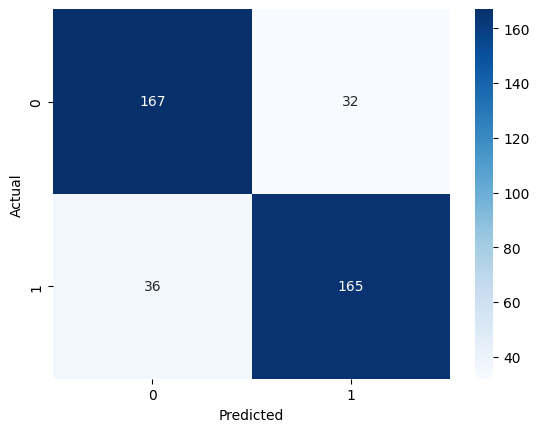

In [26]:
#Evaluation
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 📑 Documentation

## Problem Statement:
To analyze the sentiment of movie reviews using NLP techniques.

## Methodology:
1. Load movie review dataset from NLTK.
2. Preprocess the text (lowercasing, removing punctuation, etc.).
3. Vectorize the text using `CountVectorizer`.
4. Train a Logistic Regression model.
5. Evaluate using classification report and confusion matrix.

## Challenges Faced:
- Preprocessing noisy data effectively.
- Balancing model simplicity and performance.

## Outcome:
Achieved decent classification performance using a basic Logistic Regression model. More complex models like LSTM, BERT could further improve accuracy.

## Future Improvements:
- Use TF-IDF or Word Embeddings.
- Apply deep learning models.
- Test with real-world datasets like Twitter or Amazon reviews.
